In [12]:
import os
import sys
import datetime

import pandas as pd
import numpy as np
from math import radians, sin, cos, acos
import json

import sqlite3

%matplotlib inline
from matplotlib import patheffects
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_heatmap(fig, ax,df,title):
   
    m, n = len(df.index),len(df.columns)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel(title, fontsize=15)
    #ax.set_ylabel('Candidates' , fontsize=15)
    #ax.set_title('Who with who', fontsize=15, fontweight='bold')
    ax = plt.imshow(df, interpolation='nearest', cmap='seismic',aspect='auto').axes

    _ = ax.set_xticks(np.linspace(0, n-1, n))
    _ = ax.set_xticklabels(df.columns,rotation=45)
    _ = ax.set_yticks(np.linspace(0, m-1, m))
    _ = ax.set_yticklabels(df.index)


    ax.grid('off')
    ax.xaxis.tick_top()
    path_effects = [patheffects.withSimplePatchShadow(shadow_rgbFace=(1,1,1))]

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(cax=cax)
#     for i, j in product(range(m), range(n)):
#         _ = ax.text(j, i, '{0:.2f}'.format(df.iloc[i, j]),
#             size='medium', ha='center', va='center',path_effects=path_effects)
    
    return fig,ax

# Visualisation of the RTE data

In [4]:
# Get RTE data
df_30m_nationalconsumption=pd.read_csv("../../data/30m_national_consumption.csv.gz")
df_30m_nationalconsumption["tstp"]=pd.to_datetime(df_30m_nationalconsumption["tstp"])
df_30m_nationalconsumption.head()

,tstp,consumption,quality
0,2008-07-06 10:00:00,44486,Definitive
1,2008-07-06 11:00:00,46270,Definitive
2,2008-07-06 11:30:00,44801,Definitive
3,2008-07-06 13:00:00,41919,Definitive
4,2008-07-06 14:30:00,40135,Definitive


In [5]:
df_30m_nationalconsumption_definitive=df_30m_nationalconsumption[df_30m_nationalconsumption["quality"]=="Definitive"]
df_30m_nationalconsumption_definitive["energy"]=df_30m_nationalconsumption_definitive.apply(lambda row: row["consumption"]*30*60/3600,axis=1)
df_30m_nationalconsumption_definitive["day"]=df_30m_nationalconsumption_definitive.apply(lambda row: row["tstp"].strftime("%Y-%m-%d"),axis=1)
df_30m_nationalconsumption_definitive["month"]=df_30m_nationalconsumption_definitive.apply(lambda row: int(row["tstp"].strftime("%m")),axis=1)
df_30m_nationalconsumption_definitive["year"]=df_30m_nationalconsumption_definitive.apply(lambda row: int(row["tstp"].strftime("%Y")),axis=1)
df_30m_nationalconsumption_definitive["year_day"]=df_30m_nationalconsumption_definitive.apply(lambda row: int(row["tstp"].strftime("%j")),axis=1)
df_30m_nationalconsumption_definitive["weekday"]=df_30m_nationalconsumption_definitive.apply(lambda row: row["tstp"].weekday(),axis=1)
df_30m_nationalconsumption_definitive["hour"]=df_30m_nationalconsumption_definitive.apply(lambda row: int(row["tstp"].strftime("%H")),axis=1)

df_30m_nationalconsumption_definitive.head()

C:\Users\daign\Anaconda3\envs\dev_dataanalytics_36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\daign\Anaconda3\envs\dev_dataanalytics_36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\daign\Anaconda3\envs\dev_dataanalytics_36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,tstp,consumption,quality,energy,day,month,year,year_day,weekday,hour
0,2008-07-06 10:00:00,44486,Definitive,22243.0,2008-07-06,7,2008,188,6,10
1,2008-07-06 11:00:00,46270,Definitive,23135.0,2008-07-06,7,2008,188,6,11
2,2008-07-06 11:30:00,44801,Definitive,22400.5,2008-07-06,7,2008,188,6,11
3,2008-07-06 13:00:00,41919,Definitive,20959.5,2008-07-06,7,2008,188,6,13
4,2008-07-06 14:30:00,40135,Definitive,20067.5,2008-07-06,7,2008,188,6,14


In [6]:
heatmap_yearday=pd.pivot_table(df_30m_nationalconsumption_definitive, values="energy", index=['year_day'],columns=['hour'], aggfunc=np.mean)

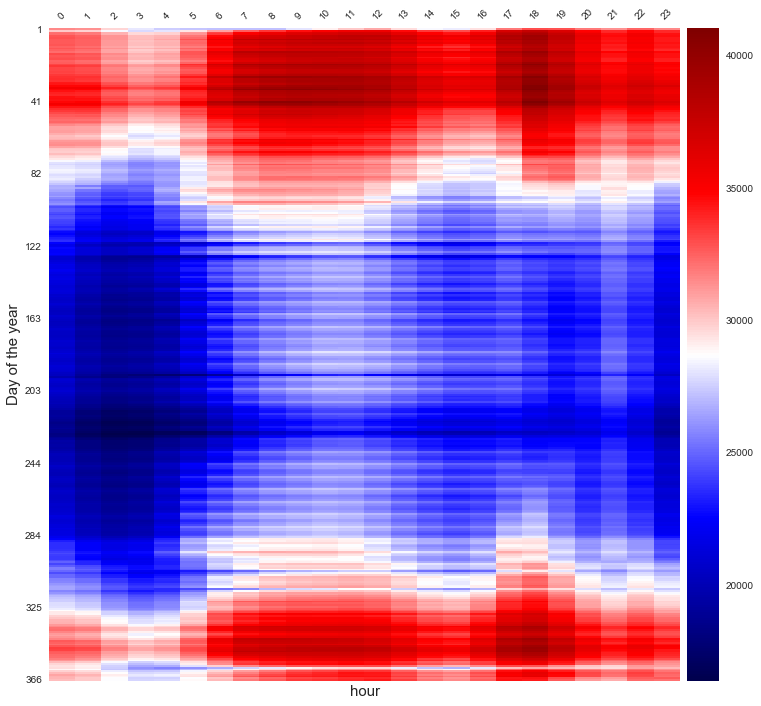

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
fig,ax=plot_heatmap(fig, ax,heatmap_yearday,"test")

ax.set_xlabel("hour",fontsize=15)
ax.set_ylabel("Day of the year",fontsize=15)

n=len(heatmap_yearday)
yticks=np.linspace(0, n-1, 10)

ylabels=[]
for y in yticks:
    ylabels.append(heatmap_yearday.index[int(y)])

ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)


plt.show()

ax.figure.savefig("../../reports/pictures/yearday_hour.png")


In [8]:
heatmap_=pd.pivot_table(df_30m_nationalconsumption_definitive, values="energy", index=['month'],columns=['weekday'], aggfunc=np.mean)
heatmap_.columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heatmap_.index=["January","February","March","April","May","June","July","August","September","October","November","December"]

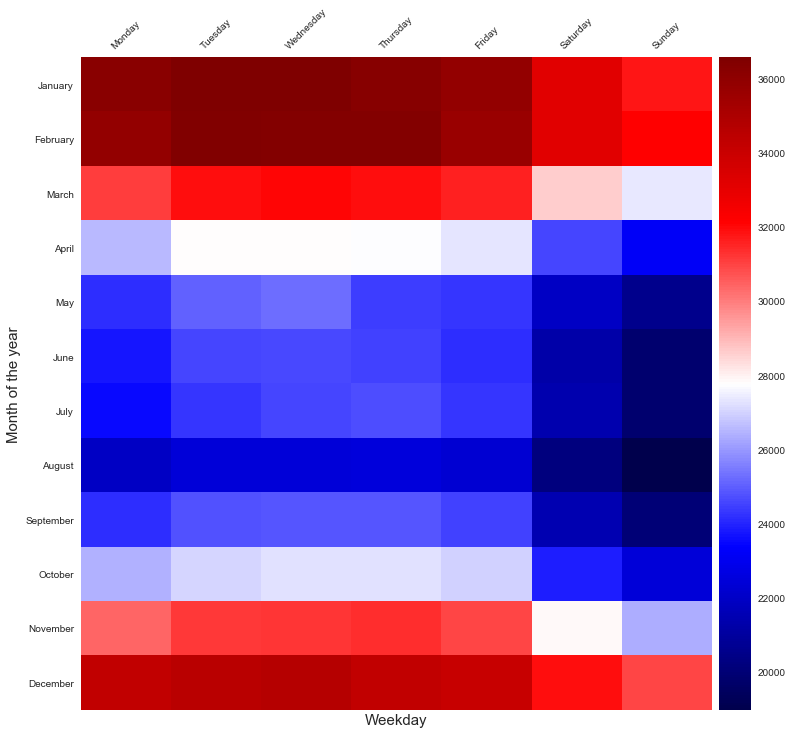

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
fig,ax=plot_heatmap(fig, ax,heatmap_,"test")
ax.set_xlabel("Weekday",fontsize=15)
ax.set_ylabel("Month of the year",fontsize=15)
plt.show()

ax.figure.savefig("../../reports/pictures/month_dayweek.png")

# Visualisation of the weather data

In [29]:
df_weather_national=pd.read_csv("../../data/weathernational_data.csv.gz")
df_weather_national["tstp"]=pd.to_datetime(df_weather_national["tstp"])
df_weather_national=df_weather_national.set_index(["tstp"])
df_weather_national.head()

,outdoor_humidity,outdoor_temperature,wind_speed
tstp,,,
2007-06-06 14:30:00,62.555688,22.965797,17.073516
2007-06-06 15:00:00,63.815123,22.869189,17.166643
2007-06-06 15:30:00,64.946597,22.470817,17.159937
2007-06-06 16:00:00,67.336973,22.186515,16.841663
2007-06-06 16:30:00,67.237105,22.166204,16.926711


In [32]:
list_df=[]
df_weather=pd.read_csv("../../data/weather_data.csv.gz")
df_weather["tstp"]=pd.to_datetime(df_weather["tstp"])
df_weather["wind_speed"]=pd.to_numeric(df_weather["wind_speed"],errors="coerce")
df_weather=df_weather[(df_weather["wind_speed"]<200) & (df_weather["wind_speed"]>0)]
df_weather=df_weather[(df_weather["outdoor_temperature"]>-20) & (df_weather["outdoor_temperature"]<50)]
df_weather=df_weather[(df_weather["outdoor_humidity"]>0) & (df_weather["outdoor_humidity"]<100)]

df_weather=df_weather[["tstp","outdoor_temperature","outdoor_humidity","wind_speed"]].set_index(["tstp"])
for param in ["outdoor_temperature","outdoor_humidity","wind_speed"]:
    print(param)
    list_df.append(df_weather[[param]].resample('30T').interpolate(method='linear'))
df_weather_cf=pd.concat(list_df,axis=1)
df_weather_cf.head()

outdoor_temperature
outdoor_humidity
wind_speed


,outdoor_temperature,outdoor_humidity,wind_speed
tstp,,,
2006-01-01 00:00:00,6.000000,54.0,22.200000
2006-01-01 00:30:00,5.833333,58.5,19.116667
2006-01-01 01:00:00,5.666667,63.0,16.033333
2006-01-01 01:30:00,5.500000,67.5,12.950000
2006-01-01 02:00:00,5.333333,72.0,9.866667


                      national  Clermont-ferrand
tstp                                            
2007-06-06 14:30:00  22.965797              22.5
2007-06-06 15:00:00  22.869189              21.0
2007-06-06 15:30:00  22.470817              19.5
2007-06-06 16:00:00  22.186515              18.0
2007-06-06 16:30:00  22.166204              18.5


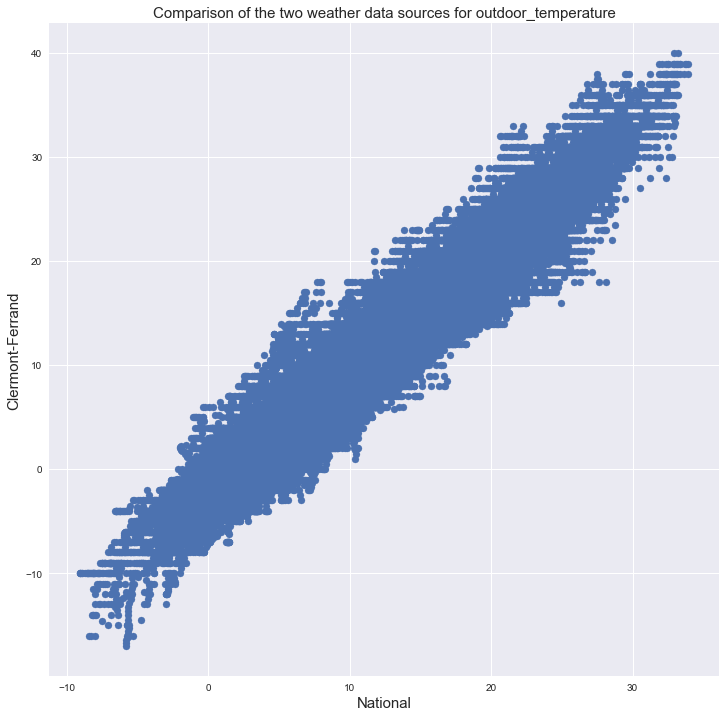

                      national  Clermont-ferrand
tstp                                            
2007-06-06 14:30:00  62.555688             67.75
2007-06-06 15:00:00  63.815123             74.50
2007-06-06 15:30:00  64.946597             81.25
2007-06-06 16:00:00  67.336973             88.00
2007-06-06 16:30:00  67.237105             88.00


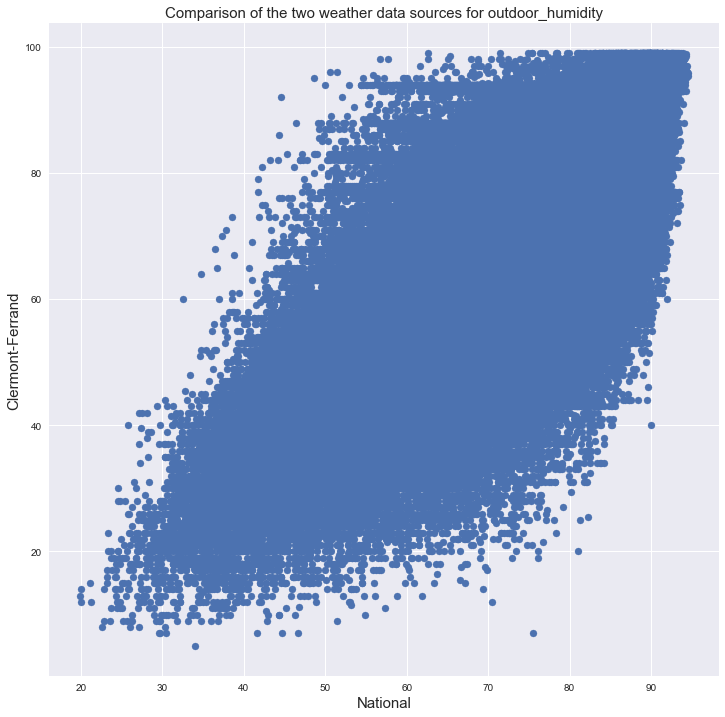

                      national  Clermont-ferrand
tstp                                            
2007-06-06 14:30:00  17.073516            17.625
2007-06-06 15:00:00  17.166643            14.850
2007-06-06 15:30:00  17.159937            12.075
2007-06-06 16:00:00  16.841663             9.300
2007-06-06 16:30:00  16.926711             7.450


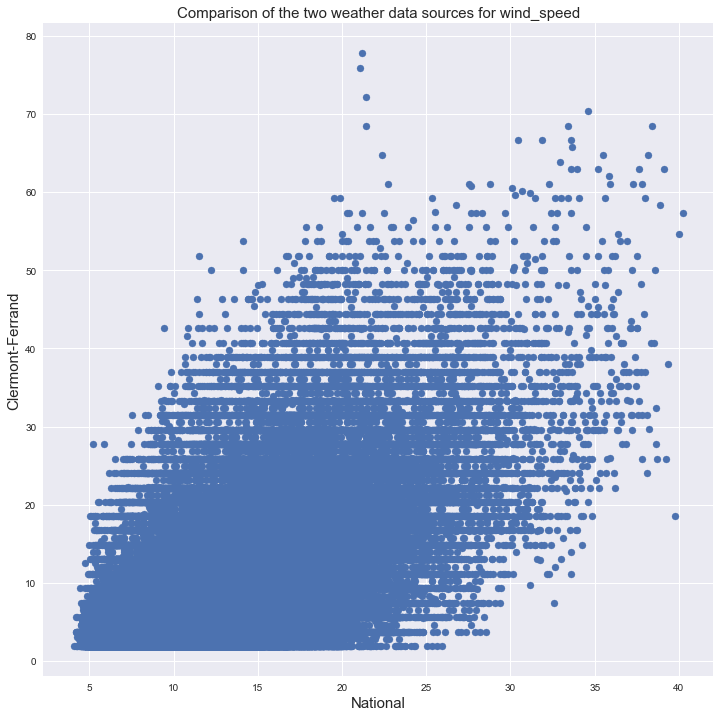

In [39]:
# Cross the two weather file
for param in ["outdoor_temperature","outdoor_humidity","wind_speed"]:
    
    df_param=pd.concat([df_weather_national[param],df_weather_cf[param]],axis=1).dropna()
    df_param.columns=["national","Clermont-ferrand"]
    print(df_param.head())
    
    
    fig, ax = plt.subplots(figsize=(12,12))
    
    ax.scatter(x=list(df_param["national"]),y=list(df_param["Clermont-ferrand"]))
    ax.set_xlabel("National",fontsize=15)
    ax.set_ylabel("Clermont-Ferrand",fontsize=15)
    plt.title("Comparison of the two weather data sources for {}".format(param),fontsize=15)
    plt.show()



polynomial regressor
random forest regressor
decision tree regressor
K-nearest neighbours
neural network mlp


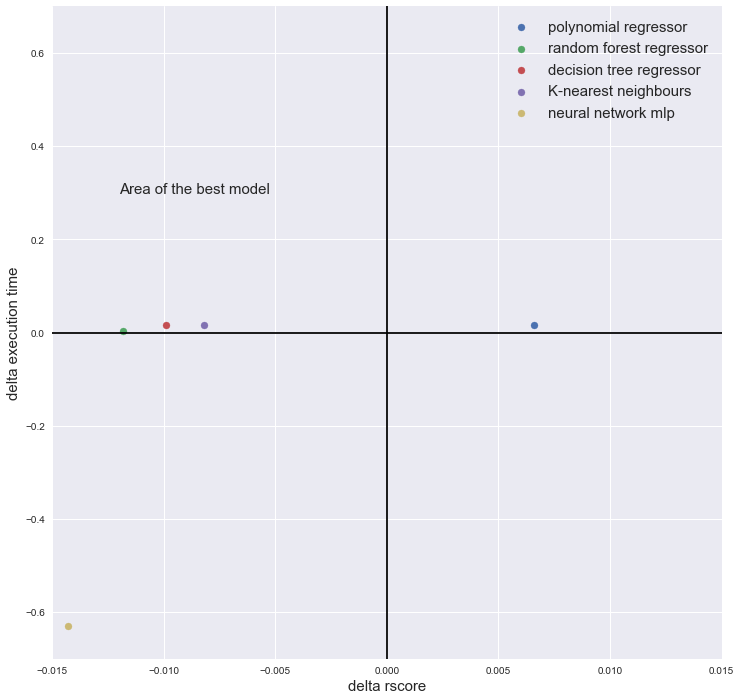

In [47]:
ref_ptg=[0.757,0.021]

fig, ax = plt.subplots(figsize=(12,12))
dict_result={
    "polynomial regressor":[0.7504,0.005],
    "random forest regressor":[0.7688,0.017],
    "decision tree regressor":[0.7669,0.004],
    "K-nearest neighbours":[0.7652,0.005],
    "neural network mlp":[0.7713,0.651]
}

for model in dict_result:
    print(model)
    delta_ptg=[ref_ptg[0]-dict_result[model][0],ref_ptg[1]-dict_result[model][1]]
    ax.scatter(x=delta_ptg[0],y=delta_ptg[1],label=model)
   
ax.set_xlim([-0.015,0.015])
ax.set_ylim([-0.7,0.7])

plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')

plt.text(-0.012,0.3,"Area of the best model",fontsize=15)


ax.set_xlabel("delta rscore",fontsize=15)
ax.set_ylabel("delta execution time",fontsize=15)
plt.legend(prop={'size': 15})
# plt.title("Comparison of the two weather data sources for {}".format(param),fontsize=15)
plt.show()


ax.figure.savefig("../../reports/pictures/free_form_visualisation.png")